In [ ]:
import os, sys
## For google colab only
from google.colab import drive
drive.mount('/content/drive')

## on Phuc's drive
%cd /content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview

Mounted at /content/drive
/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time,  cv2, sys, os, json
from PIL import Image
from skimage import io
import pandas as pd
from json import JSONEncoder
from pandas.io.json import json_normalize
from tqdm.notebook import tqdm
from collections import Counter

In [ ]:
classList = np.load('classList.npy')

In [ ]:
classList

array(['ALEPPO PINE', 'AMERICAN ARBORVITAE', 'AMERICAN SWEETGUM',
       'APRICOT', 'ARIZONA ASH', 'ARIZONA CYPRESS', 'ATLAS CEDAR',
       'AUSTRALIAN FLAME TREE', 'AUSTRALIAN WILLOW', 'AVOCADO',
       'BLACK ACACIA', 'BLACK WALNUT', 'BLUE GUM', 'BOTTLE TREE',
       'BOTTLEBRUSH', 'BOX ELDER', 'BRAZILIAN PEPPER', 'BRISBANE BOX',
       'BRONZE LOQUAT', 'BRUSH CHERRY', 'CAJEPUT TREE', 'CALIFORNIA BAY',
       'CALIFORNIA BLACK OAK', 'CALIFORNIA BUCKEYE',
       'CALIFORNIA FAN PALM', 'CALIFORNIA PEPPER', 'CAMPHOR TREE',
       'CANARY ISLAND DATE PALM', 'CANARY ISLAND PINE', 'CAROB',
       'CAROLINA LAUREL CHERRY', 'CARROTWOOD', 'CHINABERRY',
       'CHINESE ELM', 'CHINESE FLAME TREE', 'CHINESE FOUNTAIN PALM',
       'CHINESE HACKBERRY', 'CHINESE JUNIPER', 'CHINESE PISTACHE',
       'CHINESE TALLOW TREE', 'CHITALPA', 'COAST REDWOOD', 'CORK OAK',
       'CRAPE MYRTLE', 'CROWN OF GOLD TREE', 'DATE PALM', 'DEODAR CEDAR',
       'ENGLISH WALNUT', 'EVERGREEN PEAR', 'FERN PINE', 'FLOSS SI

# Training data

In [ ]:
from collections import defaultdict

# Set the directory path
directory = '/content/drive/MyDrive/Uni/Thesis/dataset/classification/StreetView'

# Initialize a defaultdict to store the file counts by folder
file_counts = defaultdict(int)

# Loop through the subdirectories in the directory
for root, dirs, files in os.walk(directory):
    # Count the number of files in the directory
    count = len(files)
    # Add the count to the file_counts dictionary, keyed by the directory name
    file_counts[os.path.basename(root)] += count

# Print the file counts by folder
for folder, count in file_counts.items():
    if(folder == 'StreetView'):
        continue
        
    idx = np.where(classList == folder)[0]
    print(f"{folder:<30} ({int(idx):>3}): \t {count:>4}\n")

BLACK ACACIA                   ( 10): 	   54

APRICOT                        (  3): 	    3

BLACK WALNUT                   ( 11): 	    3

BOTTLE TREE                    ( 13): 	 1698

BRISBANE BOX                   ( 17): 	  927

BRUSH CHERRY                   ( 19): 	  939

CAMPHOR TREE                   ( 26): 	 6745

CALIFORNIA FAN PALM            ( 24): 	 1566

CANARY ISLAND DATE PALM        ( 27): 	 1779

CHINESE ELM                    ( 33): 	  990

CARROTWOOD                     ( 31): 	  915

CAROB                          ( 29): 	  942

CORK OAK                       ( 42): 	  159

HOLLY OAK                      ( 55): 	 4673

JACARANDA                      ( 63): 	  945

LIVE OAK                       ( 70): 	 4955

MESA OAK                       ( 75): 	   81

LONDON PLANE                   ( 72): 	  165

MAINDENHAIR TREE               ( 73): 	   45

MEXICAN FAN PALM               ( 76): 	 7595

SHAMEL ASH                     (115): 	  498

SENGAL PALM                    (11

In [ ]:
trainDf = pd.DataFrame(list(file_counts.items()), columns=['Tree', 'count'])
trainDf.to_csv('InfoAnalysing/trainFolder_Info.csv', index=False)

In [ ]:
sortedTrain_dict = dict(sorted(file_counts.items(), key=lambda item: item[1], reverse=True))

for folder, count in sortedTrain_dict.items():
    if(folder == 'StreetView'):
        continue
        
    idx = np.where(classList == folder)[0]
    print(f"{folder:<30} ({int(idx):>3}): \t {count:>4}\n")

MEXICAN FAN PALM               ( 76): 	 7595

CAMPHOR TREE                   ( 26): 	 6745

LIVE OAK                       ( 70): 	 4955

HOLLY OAK                      ( 55): 	 4673

SOUTHERN MAGNOLIA              (122): 	 3852

CANARY ISLAND DATE PALM        ( 27): 	 1779

BOTTLE TREE                    ( 13): 	 1698

CALIFORNIA FAN PALM            ( 24): 	 1566

INDIAN LAUREL FIG              ( 60): 	 1005

CHINESE ELM                    ( 33): 	  990

JACARANDA                      ( 63): 	  945

CAROB                          ( 29): 	  942

BRUSH CHERRY                   ( 19): 	  939

BRISBANE BOX                   ( 17): 	  927

CARROTWOOD                     ( 31): 	  915

ITALIAN CYPRESS                ( 61): 	  810

DATE PALM                      ( 45): 	  510

SHAMEL ASH                     (115): 	  498

FERN PINE                      ( 49): 	  480

AMERICAN SWEETGUM              (  2): 	  465

INCENSE CEDAR                  ( 59): 	  420

GUADALUPE PALM                 ( 5

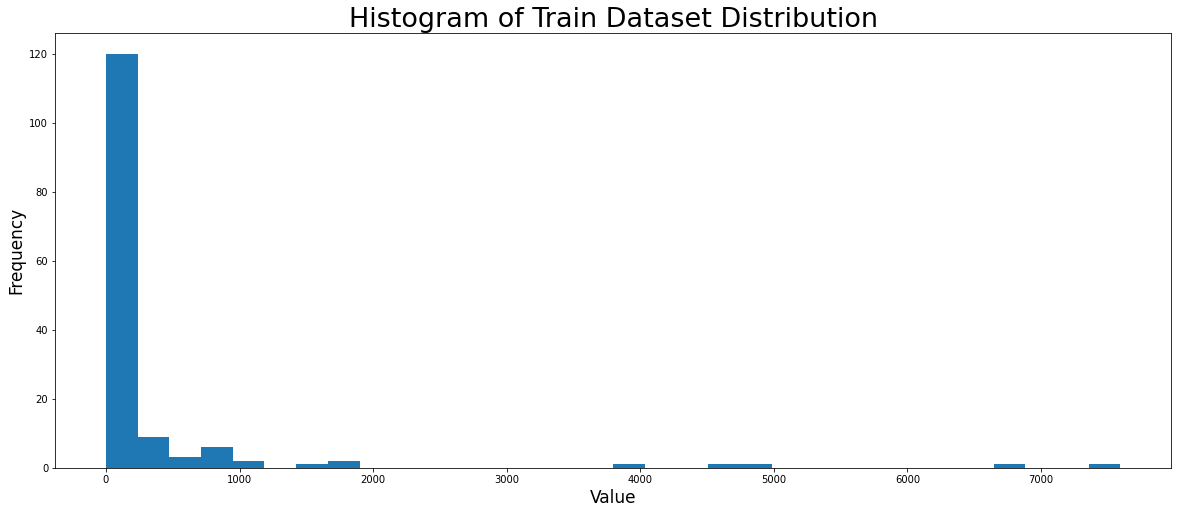

In [ ]:
# plot histogram
plt.figure(figsize=(20,8))
plt.hist(list(sortedTrain_dict.values()), bins= 32)
plt.xlabel('Value', size = 17)
plt.ylabel('Frequency', size = 17)
plt.title('Histogram of Train Dataset Distribution', size = 27)
plt.show()

# Testing data

In [ ]:
treeLoc = pd.read_csv('/content/drive/MyDrive/Uni/Thesis/Repo/classification/streetview/treeLocation.csv')
tree_dict = Counter(treeLoc.iloc[:, 1])
tree_dict = dict(sorted(tree_dict.items()))
for e in tree_dict:
    idx = np.where(classList == e)[0]
    print(f"| {int(idx):>3} | {e:<30}| {tree_dict[e]:>4} \n")

|   0 | ALEPPO PINE                   |  137 

|   1 | AMERICAN ARBORVITAE           |   17 

|   2 | AMERICAN SWEETGUM             | 1255 

|   3 | APRICOT                       |   13 

|   4 | ARIZONA ASH                   |   38 

|   5 | ARIZONA CYPRESS               |   25 

|   6 | ATLAS CEDAR                   |   16 

|   7 | AUSTRALIAN FLAME TREE         |   69 

|   8 | AUSTRALIAN WILLOW             |   50 

|   9 | AVOCADO                       |   50 

|  10 | BLACK ACACIA                  |  146 

|  11 | BLACK WALNUT                  |    6 

|  12 | BLUE GUM                      |   53 

|  13 | BOTTLE TREE                   | 1057 

|  14 | BOTTLEBRUSH                   |  124 

|  15 | BOX ELDER                     |    3 

|  16 | BRAZILIAN PEPPER              |   96 

|  17 | BRISBANE BOX                  | 1418 

|  18 | BRONZE LOQUAT                 |   90 

|  19 | BRUSH CHERRY                  | 1029 

|  20 | CAJEPUT TREE                  |  497 

|  21 | CALIF

In [ ]:
trainAclassesDf = pd.DataFrame(list(tree_dict.items()), columns=['Tree', 'count'])
trainAclassesDf.to_csv('InfoAnalysing/testFolder_avaialabeCls_Info.csv', index=False)

In [ ]:
sorted_dict = dict(sorted(tree_dict.items(), key=lambda item: item[1], reverse=True))

for e in sorted_dict:
    idx = np.where(classList == e)[0]
    print(f"{e:<30} ({int(idx):>3}):\t {tree_dict[e]:>4} \n")

LIVE OAK                       ( 70):	 6498 

SOUTHERN MAGNOLIA              (122):	 5846 

CAMPHOR TREE                   ( 26):	 5725 

MEXICAN FAN PALM               ( 76):	 4872 

HOLLY OAK                      ( 55):	 4188 

CHINESE ELM                    ( 33):	 3583 

CRAPE MYRTLE                   ( 43):	 2386 

JACARANDA                      ( 63):	 1682 

BRISBANE BOX                   ( 17):	 1418 

CARROTWOOD                     ( 31):	 1375 

AMERICAN SWEETGUM              (  2):	 1255 

CAROB                          ( 29):	 1080 

BOTTLE TREE                    ( 13):	 1057 

BRUSH CHERRY                   ( 19):	 1029 

CANARY ISLAND DATE PALM        ( 27):	  924 

GLOSSY PRIVET                  ( 52):	  913 

SAWTOOTH ZELKOVA               (113):	  904 

CALIFORNIA FAN PALM            ( 24):	  811 

ITALIAN CYPRESS                ( 61):	  776 

YEW PINE                       (145):	  766 

STUMP                          (125):	  725 

INDIAN LAUREL FIG              ( 6

# Available Pano data

In [ ]:
aId = np.load('availableTree.npy')
idList =  aId[:,0].astype(int)

In [ ]:
treeLoc

,OBJECTID,Common_Name,Longitude,Latitude,LONG,LAT
0,1019,CARROTWOOD,-118.147762,34.146522,-118.147762,34.146522
1,1020,CARROTWOOD,-118.147764,34.146634,-118.147764,34.146634
2,1021,CARROTWOOD,-118.147549,34.146562,-118.147549,34.146562
3,1022,CARROTWOOD,-118.164221,34.146866,-118.164221,34.146866
4,1023,CARROTWOOD,-118.164190,34.146868,-118.164190,34.146868
...,...,...,...,...,...,...
62239,76406,ORANGE,-118.175436,34.179010,-118.175436,34.179010
62240,76767,LIVE OAK,-118.148423,34.177816,-118.148423,34.177816
62241,76768,HOLLY OAK,-118.149059,34.175195,-118.149059,34.175195
62242,76409,ORANGE,-118.175348,34.179004,-118.175348,34.179004


In [ ]:
availablePano_DF = treeLoc[treeLoc['OBJECTID'].isin(idList)]
availablePano_DF

,OBJECTID,Common_Name,Longitude,Latitude,LONG,LAT
1,1020,CARROTWOOD,-118.147764,34.146634,-118.147764,34.146634
2,1021,CARROTWOOD,-118.147549,34.146562,-118.147549,34.146562
5,1024,CARROTWOOD,-118.147779,34.147326,-118.147779,34.147326
6,1026,CARROTWOOD,-118.147551,34.147145,-118.147551,34.147145
7,1027,CARROTWOOD,-118.147551,34.147273,-118.147551,34.147273
...,...,...,...,...,...,...
62214,76390,HOLLY OAK,-118.159281,34.162081,-118.159281,34.162081
62216,76751,MEXICAN FAN PALM,-118.135513,34.145774,-118.135513,34.145774
62217,76391,HOLLY OAK,-118.159389,34.162084,-118.159389,34.162084
62218,76752,MAINDENHAIR TREE,-118.135432,34.145780,-118.135432,34.145780


In [ ]:
availablePano_DF.to_csv('InfoAnalysing/testFolder_availPano_Info.csv', index=False)

In [ ]:
availPanoTree_dict = Counter(availablePano_DF.iloc[:, 1])
availPanoTree_dict = dict(sorted(availPanoTree_dict.items()))
for e in availPanoTree_dict:
    idx = np.where(classList == e)[0]
    print(f"| {int(idx):>3} | {e:<30}| {availPanoTree_dict[e]:>4} \n")

|   0 | ALEPPO PINE                   |   26 

|   1 | AMERICAN ARBORVITAE           |    6 

|   2 | AMERICAN SWEETGUM             |  217 

|   3 | APRICOT                       |    6 

|   4 | ARIZONA ASH                   |   13 

|   5 | ARIZONA CYPRESS               |    5 

|   6 | ATLAS CEDAR                   |    9 

|   7 | AUSTRALIAN FLAME TREE         |   24 

|   8 | AUSTRALIAN WILLOW             |   12 

|   9 | AVOCADO                       |   24 

|  10 | BLACK ACACIA                  |   37 

|  11 | BLACK WALNUT                  |    5 

|  12 | BLUE GUM                      |    3 

|  13 | BOTTLE TREE                   |  645 

|  14 | BOTTLEBRUSH                   |   59 

|  16 | BRAZILIAN PEPPER              |   10 

|  17 | BRISBANE BOX                  |  669 

|  18 | BRONZE LOQUAT                 |   32 

|  19 | BRUSH CHERRY                  |  442 

|  20 | CAJEPUT TREE                  |  101 

|  21 | CALIFORNIA BAY                |   29 

|  22 | CALIF

In [ ]:
sortedAvailP_dict = dict(sorted(availPanoTree_dict.items(), key=lambda item: item[1], reverse=True))

for e in sortedAvailP_dict:
    idx = np.where(classList == e)[0]
    print(f"{e:<30} ({int(idx):>3}): \t {sortedAvailP_dict[e]:>4} \n")

LIVE OAK                       ( 70): 	 3049 

CAMPHOR TREE                   ( 26): 	 2867 

MEXICAN FAN PALM               ( 76): 	 2761 

HOLLY OAK                      ( 55): 	 2508 

SOUTHERN MAGNOLIA              (122): 	 2431 

CRAPE MYRTLE                   ( 43): 	 1220 

CARROTWOOD                     ( 31): 	  691 

BRISBANE BOX                   ( 17): 	  669 

BOTTLE TREE                    ( 13): 	  645 

CANARY ISLAND DATE PALM        ( 27): 	  610 

CALIFORNIA FAN PALM            ( 24): 	  605 

JACARANDA                      ( 63): 	  601 

CHINESE ELM                    ( 33): 	  525 

INDIAN LAUREL FIG              ( 60): 	  495 

BRUSH CHERRY                   ( 19): 	  442 

CAROB                          ( 29): 	  377 

LAVENDER BLOOM                 ( 68): 	  361 

CORK OAK                       ( 42): 	  355 

ITALIAN CYPRESS                ( 61): 	  337 

LONDON PLANE                   ( 72): 	  297 

WINDMILL PALM                  (144): 	  297 

YEW PINE     

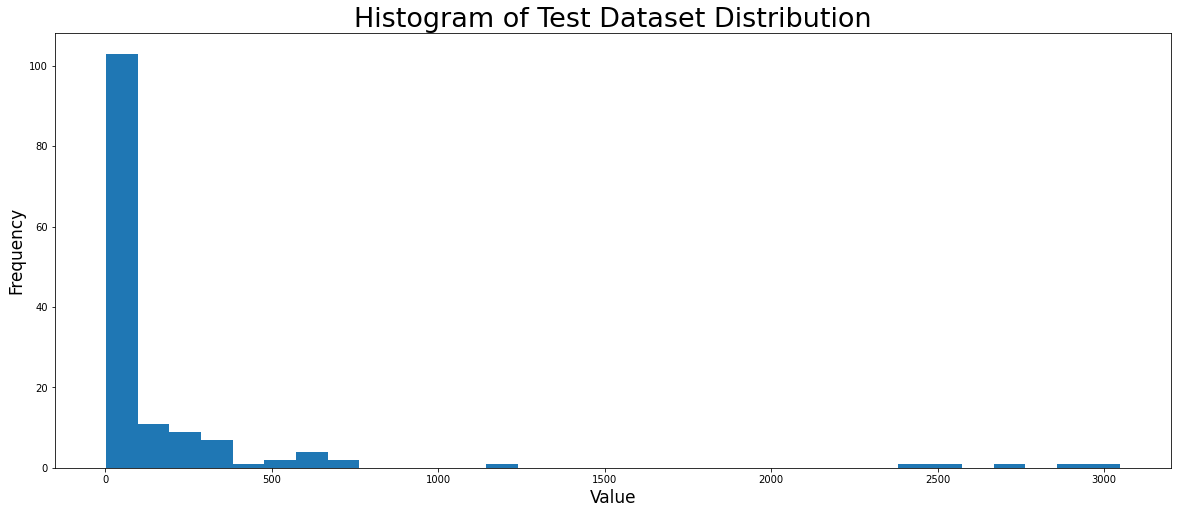

In [ ]:
# plot histogram
plt.figure(figsize=(20,8))
plt.hist(list(sortedAvailP_dict.values()), bins= 32)
plt.xlabel('Value', size = 17)
plt.ylabel('Frequency', size =17)
plt.title('Histogram of Test Dataset Distribution', size = 27)
plt.show()

# Classes selection

In [ ]:
trainDf = pd.read_csv('InfoAnalysing/trainFolder_Info.csv')
availPanoDf = pd.read_csv('InfoAnalysing/testFolder_availPano_Info.csv')

In [ ]:
availPanoDf

,OBJECTID,Common_Name,Longitude,Latitude,LONG,LAT
0,1020,CARROTWOOD,-118.147764,34.146634,-118.147764,34.146634
1,1021,CARROTWOOD,-118.147549,34.146562,-118.147549,34.146562
2,1024,CARROTWOOD,-118.147779,34.147326,-118.147779,34.147326
3,1026,CARROTWOOD,-118.147551,34.147145,-118.147551,34.147145
4,1027,CARROTWOOD,-118.147551,34.147273,-118.147551,34.147273
...,...,...,...,...,...,...
27827,76390,HOLLY OAK,-118.159281,34.162081,-118.159281,34.162081
27828,76751,MEXICAN FAN PALM,-118.135513,34.145774,-118.135513,34.145774
27829,76391,HOLLY OAK,-118.159389,34.162084,-118.159389,34.162084
27830,76752,MAINDENHAIR TREE,-118.135432,34.145780,-118.135432,34.145780


In [ ]:
availPanoTree_dict = Counter(availPanoDf.iloc[:, 1])
sortedAvailP_dict = dict(sorted(availPanoTree_dict.items(), key=lambda item: item[1], reverse=True))

In [ ]:
sTrain_df = trainDf.sort_values('count', ascending=False)
availPano_df = pd.DataFrame(list(sortedAvailP_dict.items()), columns=['Tree', 'Tcount'])

In [ ]:
def getClassNo(row):
    return np.where(classList == row['Tree'])[0]

In [ ]:
merged_df = pd.merge(sTrain_df, availPano_df, on = 'Tree')
merged_df = merged_df.sort_values(by=['count', 'Tcount'], ascending=False)
merged_df['ClassNo'] = merged_df.apply( lambda row: (np.where(classList == row['Tree'])[0][0]), axis=1)
pd.set_option('display.max_rows', None)
merged_df

,Tree,count,Tcount,ClassNo
0,MEXICAN FAN PALM,7595,2761,76
1,CAMPHOR TREE,6745,2867,26
2,LIVE OAK,4955,3049,70
3,HOLLY OAK,4673,2508,55
4,SOUTHERN MAGNOLIA,3852,2431,122
5,CANARY ISLAND DATE PALM,1779,610,27
6,BOTTLE TREE,1698,645,13
7,CALIFORNIA FAN PALM,1566,605,24
8,INDIAN LAUREL FIG,1005,495,60
9,CHINESE ELM,990,525,33
